In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/main_data.csv")

In [3]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2022-01-01,12,6,0.0,6.8,2,1,07:17 AM,02:59 PM,08:31 AM,...,15,39,93,0.0,1025,12,7,193,8,Bad-Honningen
1,2022-01-02,11,5,0.0,3.0,2,0,08:35 AM,03:58 PM,08:31 AM,...,22,79,85,0.5,1020,11,9,208,14,Bad-Honningen
2,2022-01-03,11,9,0.0,3.0,2,0,09:38 AM,05:13 PM,08:31 AM,...,26,100,77,0.4,1015,11,10,251,20,Bad-Honningen
3,2022-01-04,8,1,4.8,3.0,1,6,10:22 AM,06:37 PM,08:31 AM,...,12,100,96,10.7,1004,8,5,215,10,Bad-Honningen
4,2022-01-05,4,1,0.0,4.9,1,13,10:54 AM,08:03 PM,08:31 AM,...,18,80,85,0.1,1009,4,9,300,15,Bad-Honningen


In [4]:
df['date_time']=pd.to_datetime(df['date_time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          3660 non-null   datetime64[ns]
 1   maxtempC           3660 non-null   int64         
 2   mintempC           3660 non-null   int64         
 3   totalSnow_cm       3660 non-null   float64       
 4   sunHour            3660 non-null   float64       
 5   uvIndex            3660 non-null   int64         
 6   moon_illumination  3660 non-null   int64         
 7   moonrise           3660 non-null   object        
 8   moonset            3660 non-null   object        
 9   sunrise            3660 non-null   object        
 10  sunset             3660 non-null   object        
 11  DewPointC          3660 non-null   int64         
 12  FeelsLikeC         3660 non-null   int64         
 13  HeatIndexC         3660 non-null   int64         
 14  WindChil

# with one coulm

<Axes: xlabel='date_time'>

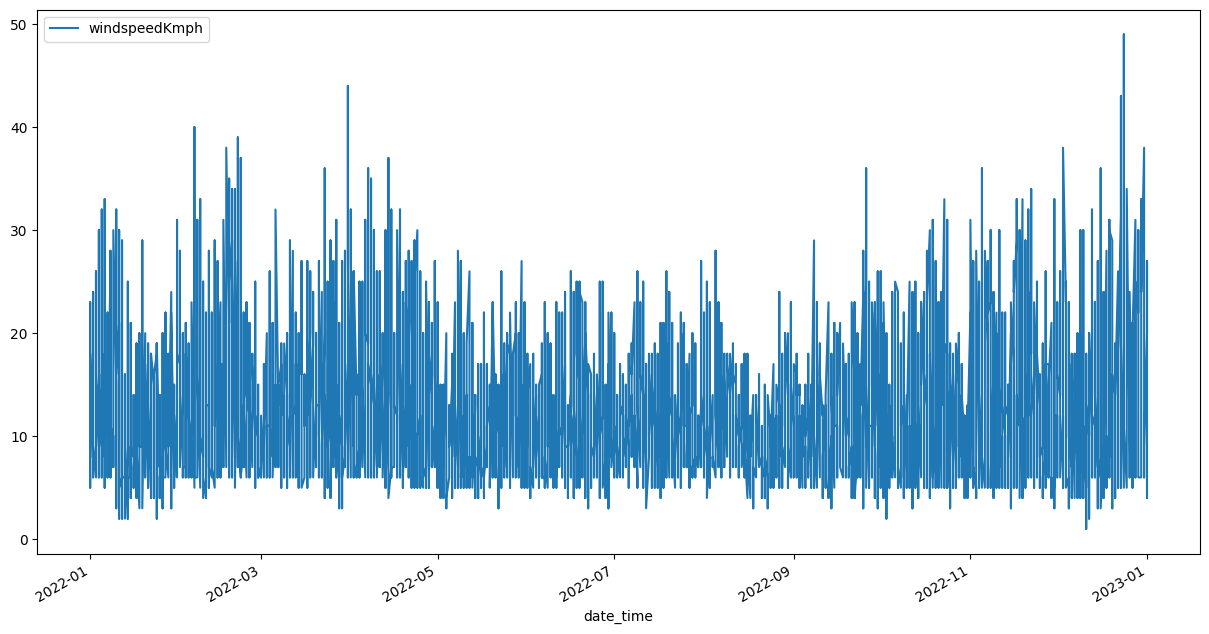

In [6]:
df.plot(x='date_time',y='windspeedKmph',figsize=(15,8))

<ipython-input-7-712c7117188d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'),annot=True, cbar=False, cmap='Blues', fmt='.1f')


<Axes: >

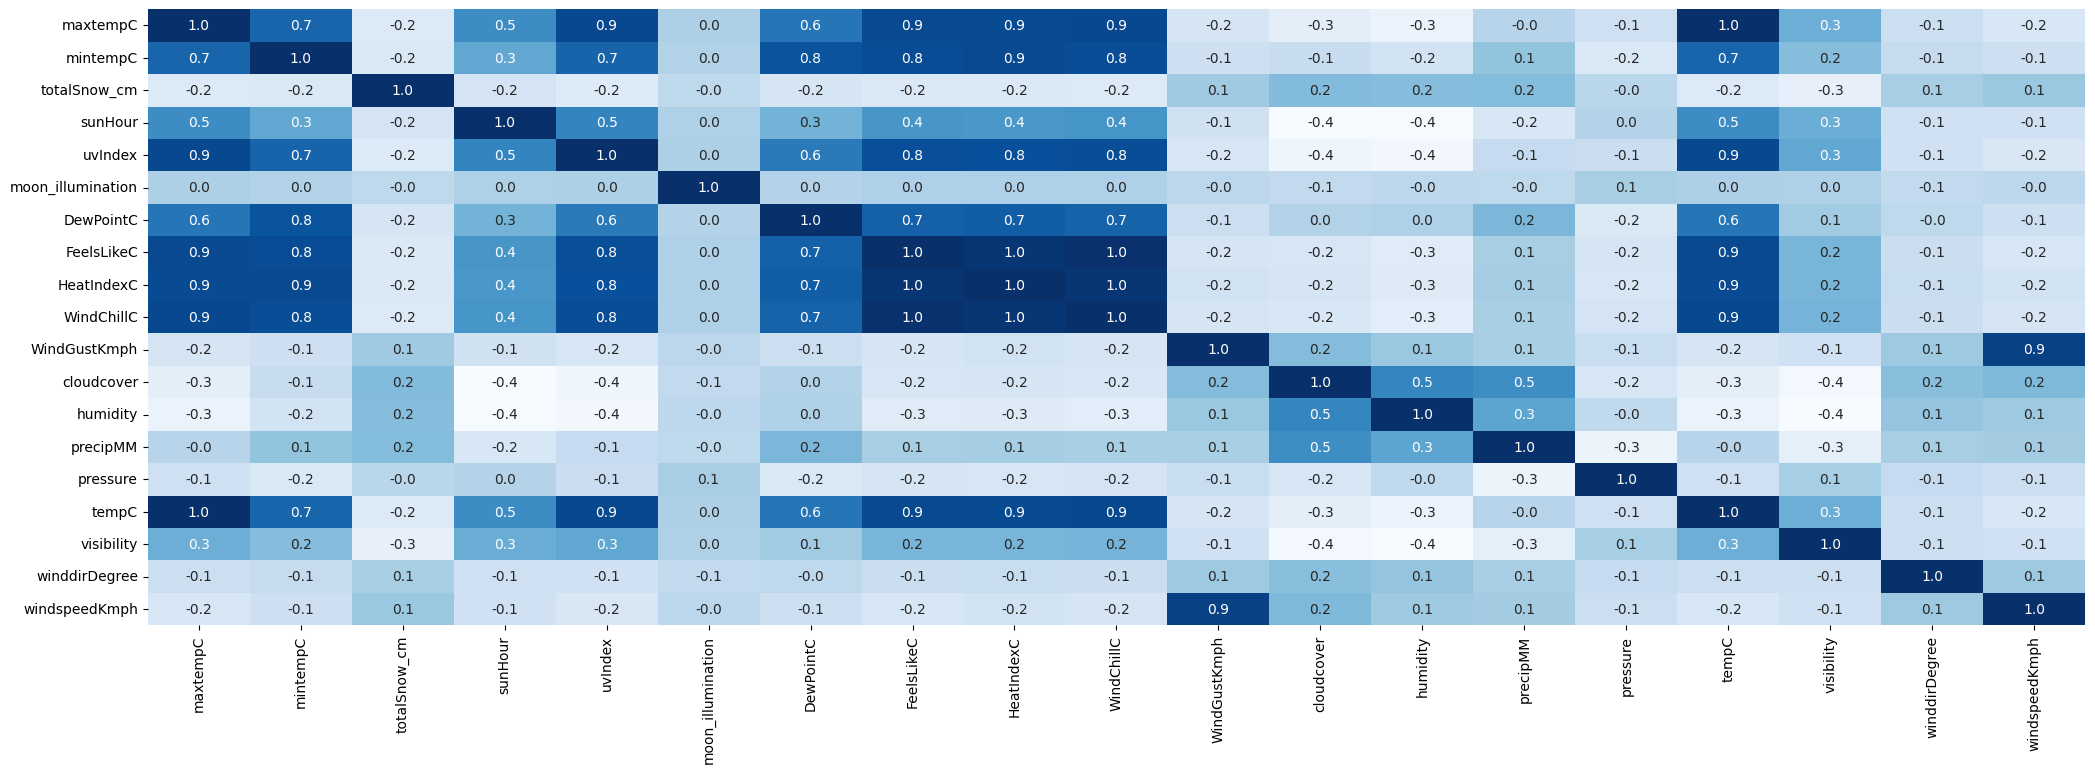

In [7]:
plt.figure(figsize=(25,8))
sns.heatmap(df.corr(method='kendall'),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [8]:
df.isna().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
location             0
dtype: int64

<Axes: >

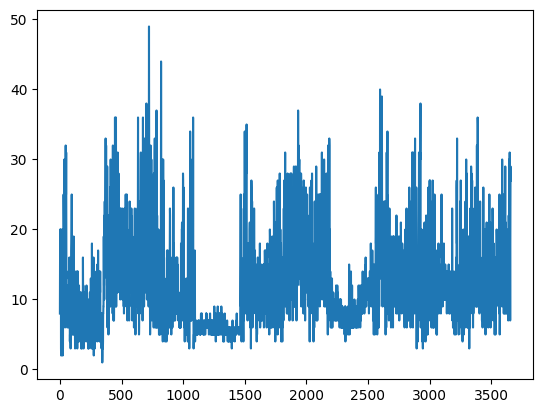

In [9]:
wind = df['windspeedKmph']
wind.plot()

In [10]:
def df_to_X_y (df,future, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+future]
    y.append(label)
  return np.array(X), np.array(y)

In [11]:
WINDOW_SIZE = 5
future = 1
X1, y1 = df_to_X_y(wind,future, WINDOW_SIZE)
X1.shape, y1.shape

((3655, 5, 1), (3655,))

In [12]:
3655*0.7

2558.5

In [13]:
X_train1, y_train1 = X1[:2558], y1[:2558]
X_val1, y_val1 = X1[2558:3000], y1[2558:3000]
X_test1, y_test1 = X1[3000:], y1[3000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2558, 5, 1), (2558,), (442, 5, 1), (442,), (655, 5, 1), (655,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(200))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 8)                 1608      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 163217 (637.57 KB)
Trainable params: 163217 (637.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
80/80 [==============================] - 17s 151ms/step - loss: 149.5886 - root_mean_squared_error: 12.2306 - val_loss: 171.0158 - val_root_mean_squared_error: 13.0773
Epoch 2/20
80/80 [==============================] - 6s 79ms/step - loss: 83.3165 - root_mean_squared_error: 9.1278 - val_loss: 90.8448 - val_root_mean_squared_error: 9.5313
Epoch 3/20
80/80 [==============================] - 5s 64ms/step - loss: 47.7664 - root_mean_squared_error: 6.9113 - val_loss: 61.2113 - val_root_mean_squared_error: 7.8238
Epoch 4/20
80/80 [==============================] - 6s 75ms/step - loss: 36.0221 - root_mean_squared_error: 6.0018 - val_loss: 48.5987 - val_root_mean_squared_error: 6.9713
Epoch 5/20
80/80 [==============================] - 6s 73ms/step - loss: 27.5731 - root_mean_squared_error: 5.2510 - val_loss: 39.1867 - val_root_mean_squared_error: 6.2599
Epoch 6/20
80/80 [==============================] - 6s 71ms/step - loss: 22.3204 - root_mean_squared_error: 4.7244 - val_loss: 32

In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [18]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 [==============================] - 1s 6ms/step


,Train Predictions,Actuals
0,14.435400,14
1,20.588766,20
2,11.074965,10
3,14.457858,15
4,8.600738,8
...,...,...
2553,13.637900,14
2554,10.650063,11
2555,6.141590,5
2556,10.343996,10


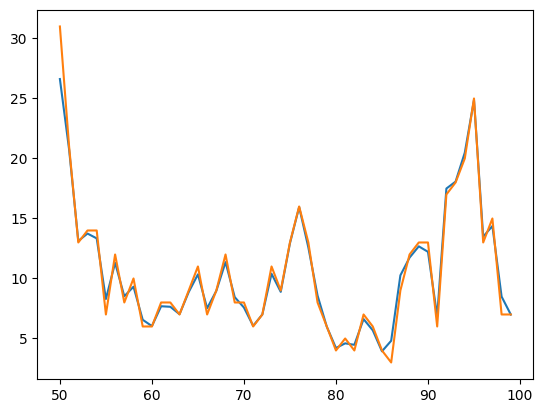

In [19]:

plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [20]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals(test)':y_test1})
test_results

21/21 [==============================] - 0s 6ms/step


,Test Predictions,Actuals(test)
0,25.790905,27
1,15.447048,16
2,25.472940,27
3,11.326488,9
4,9.075520,10
...,...,...
650,12.221013,10
651,19.596689,19
652,13.411166,14
653,7.391660,7


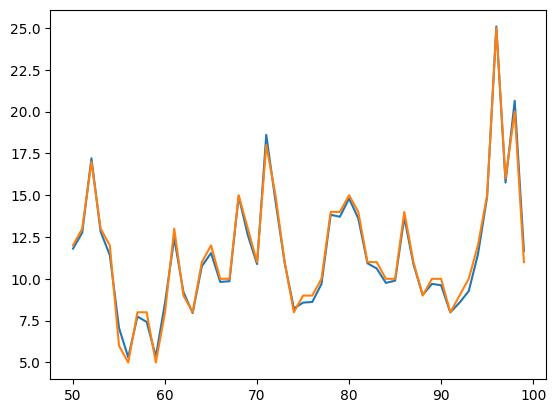

In [21]:

plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals(test)'][50:100])

# with many coulm

In [22]:
features = df.corr()['windspeedKmph'].sort_values()

features

<ipython-input-22-e78135e8ec11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = df.corr()['windspeedKmph'].sort_values()


sunHour             -0.297527
maxtempC            -0.296605
tempC               -0.296605
uvIndex             -0.290585
FeelsLikeC          -0.289654
WindChillC          -0.285270
pressure            -0.245755
HeatIndexC          -0.231650
mintempC            -0.178821
DewPointC           -0.169780
visibility          -0.149325
moon_illumination   -0.041550
totalSnow_cm         0.060646
precipMM             0.157644
humidity             0.162026
winddirDegree        0.179817
cloudcover           0.372691
WindGustKmph         0.979701
windspeedKmph        1.000000
Name: windspeedKmph, dtype: float64

<Axes: >

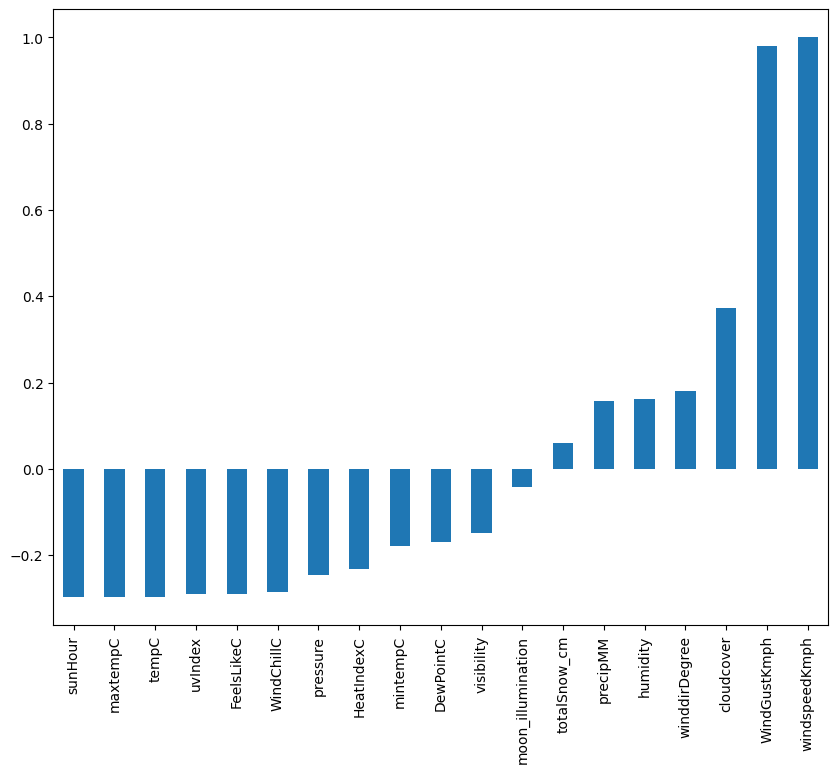

In [23]:
features.plot(kind='bar',figsize=(10,8))

In [24]:
df_forcasting = df.drop("WindGustKmph",axis = 1)

In [25]:
df_forcasting = df.drop("location",axis = 1)

In [26]:
df_forcasting.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2022-01-01,12,6,0.0,6.8,2,1,07:17 AM,02:59 PM,08:31 AM,...,7,15,39,93,0.0,1025,12,7,193,8
1,2022-01-02,11,5,0.0,3.0,2,0,08:35 AM,03:58 PM,08:31 AM,...,7,22,79,85,0.5,1020,11,9,208,14
2,2022-01-03,11,9,0.0,3.0,2,0,09:38 AM,05:13 PM,08:31 AM,...,7,26,100,77,0.4,1015,11,10,251,20
3,2022-01-04,8,1,4.8,3.0,1,6,10:22 AM,06:37 PM,08:31 AM,...,3,12,100,96,10.7,1004,8,5,215,10
4,2022-01-05,4,1,0.0,4.9,1,13,10:54 AM,08:03 PM,08:31 AM,...,-1,18,80,85,0.1,1009,4,9,300,15


In [27]:
df_forcasting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          3660 non-null   datetime64[ns]
 1   maxtempC           3660 non-null   int64         
 2   mintempC           3660 non-null   int64         
 3   totalSnow_cm       3660 non-null   float64       
 4   sunHour            3660 non-null   float64       
 5   uvIndex            3660 non-null   int64         
 6   moon_illumination  3660 non-null   int64         
 7   moonrise           3660 non-null   object        
 8   moonset            3660 non-null   object        
 9   sunrise            3660 non-null   object        
 10  sunset             3660 non-null   object        
 11  DewPointC          3660 non-null   int64         
 12  FeelsLikeC         3660 non-null   int64         
 13  HeatIndexC         3660 non-null   int64         
 14  WindChil

In [28]:
df_forcasting['moonrise'] = df_forcasting['moonrise'].astype(str)
df_forcasting['moonrise'] = df_forcasting['moonrise'].apply(lambda x: x.replace('PM',''))
df_forcasting['moonrise'] = df_forcasting['moonrise'].apply(lambda x: x.replace('AM',''))
df_forcasting['moonrise'] = df_forcasting['moonrise'].apply(lambda x: x.replace(':','.'))
df_forcasting['moonrise'] = df_forcasting['moonrise'].apply(lambda x: x.replace('No moonrise','0'))
df_forcasting['moonrise'] = df_forcasting['moonrise'].astype(float)


In [29]:
df_forcasting['moonset'] = df_forcasting['moonset'].astype(str)
df_forcasting['moonset'] = df_forcasting['moonset'].apply(lambda x: x.replace('PM',''))
df_forcasting['moonset'] = df_forcasting['moonset'].apply(lambda x: x.replace('AM',''))
df_forcasting['moonset'] = df_forcasting['moonset'].apply(lambda x: x.replace(':','.'))
df_forcasting['moonset'] = df_forcasting['moonset'].apply(lambda x: x.replace('No moonset','0'))
df_forcasting['moonset'] = df_forcasting['moonset'].astype(float)

In [30]:
df_forcasting['sunrise'] = df_forcasting['sunrise'].astype(str)
df_forcasting['sunrise'] = df_forcasting['sunrise'].apply(lambda x: x.replace('PM',''))
df_forcasting['sunrise'] = df_forcasting['sunrise'].apply(lambda x: x.replace('AM',''))
df_forcasting['sunrise'] = df_forcasting['sunrise'].apply(lambda x: x.replace(':','.'))
df_forcasting['sunrise'] = df_forcasting['sunrise'].apply(lambda x: x.replace('No sunrise','0'))
df_forcasting['sunrise'] = df_forcasting['sunrise'].astype(float)

In [31]:
df_forcasting['sunset'] = df_forcasting['sunset'].astype(str)
df_forcasting['sunset'] = df_forcasting['sunset'].apply(lambda x: x.replace('PM',''))
df_forcasting['sunset'] = df_forcasting['sunset'].apply(lambda x: x.replace('AM',''))
df_forcasting['sunset'] = df_forcasting['sunset'].apply(lambda x: x.replace(':','.'))
df_forcasting['sunset'] = df_forcasting['sunset'].apply(lambda x: x.replace('No sunset','0'))
df_forcasting['sunset'] = df_forcasting['sunset'].astype(float)

In [32]:
df_forcasting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          3660 non-null   datetime64[ns]
 1   maxtempC           3660 non-null   int64         
 2   mintempC           3660 non-null   int64         
 3   totalSnow_cm       3660 non-null   float64       
 4   sunHour            3660 non-null   float64       
 5   uvIndex            3660 non-null   int64         
 6   moon_illumination  3660 non-null   int64         
 7   moonrise           3660 non-null   float64       
 8   moonset            3660 non-null   float64       
 9   sunrise            3660 non-null   float64       
 10  sunset             3660 non-null   float64       
 11  DewPointC          3660 non-null   int64         
 12  FeelsLikeC         3660 non-null   int64         
 13  HeatIndexC         3660 non-null   int64         
 14  WindChil

In [33]:
df_forcasting.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2022-01-01,12,6,0.0,6.8,2,1,7.17,2.59,8.31,...,7,15,39,93,0.0,1025,12,7,193,8
1,2022-01-02,11,5,0.0,3.0,2,0,8.35,3.58,8.31,...,7,22,79,85,0.5,1020,11,9,208,14
2,2022-01-03,11,9,0.0,3.0,2,0,9.38,5.13,8.31,...,7,26,100,77,0.4,1015,11,10,251,20
3,2022-01-04,8,1,4.8,3.0,1,6,10.22,6.37,8.31,...,3,12,100,96,10.7,1004,8,5,215,10
4,2022-01-05,4,1,0.0,4.9,1,13,10.54,8.03,8.31,...,-1,18,80,85,0.1,1009,4,9,300,15


In [34]:
features = df_forcasting.corr()['windspeedKmph'].sort_values()

features

<ipython-input-34-129d6eae7054>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = df_forcasting.corr()['windspeedKmph'].sort_values()


sunHour             -0.297527
maxtempC            -0.296605
tempC               -0.296605
uvIndex             -0.290585
FeelsLikeC          -0.289654
WindChillC          -0.285270
pressure            -0.245755
HeatIndexC          -0.231650
mintempC            -0.178821
DewPointC           -0.169780
visibility          -0.149325
moon_illumination   -0.041550
moonset             -0.029771
sunset              -0.006687
moonrise             0.012606
totalSnow_cm         0.060646
precipMM             0.157644
humidity             0.162026
winddirDegree        0.179817
sunrise              0.205673
cloudcover           0.372691
WindGustKmph         0.979701
windspeedKmph        1.000000
Name: windspeedKmph, dtype: float64

<Axes: >

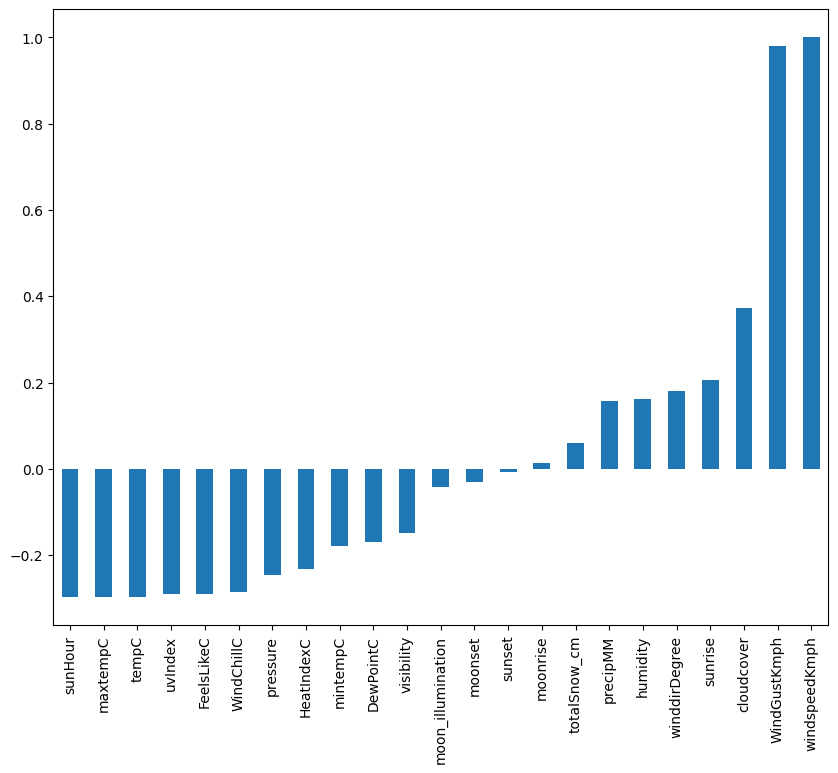

In [35]:
features.plot(kind='bar',figsize=(10,8))

In [36]:
df_forcasting = df_forcasting.drop("moonset",axis = 1)
df_forcasting = df_forcasting.drop("sunset",axis = 1)
df_forcasting = df_forcasting.drop("moonrise",axis = 1)

In [37]:
df_forcasting.isna().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
sunrise              0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [38]:
df_forcasting.index = pd.to_datetime(df['date_time'], format='%d.%m.%Y %H:%M:%S')
df_forcasting = df_forcasting.drop("date_time",axis = 1)
df_forcasting.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,sunrise,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2022-01-01,12,6,0.0,6.8,2,1,8.31,7,7,8,7,15,39,93,0.0,1025,12,7,193,8
2022-01-02,11,5,0.0,3.0,2,0,8.31,6,7,9,7,22,79,85,0.5,1020,11,9,208,14
2022-01-03,11,9,0.0,3.0,2,0,8.31,6,7,10,7,26,100,77,0.4,1015,11,10,251,20
2022-01-04,8,1,4.8,3.0,1,6,8.31,5,3,5,3,12,100,96,10.7,1004,8,5,215,10
2022-01-05,4,1,0.0,4.9,1,13,8.31,1,-1,3,-1,18,80,85,0.1,1009,4,9,300,15


In [39]:
df_forcasting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3660 entries, 2022-01-01 to 2023-01-01
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           3660 non-null   int64  
 1   mintempC           3660 non-null   int64  
 2   totalSnow_cm       3660 non-null   float64
 3   sunHour            3660 non-null   float64
 4   uvIndex            3660 non-null   int64  
 5   moon_illumination  3660 non-null   int64  
 6   sunrise            3660 non-null   float64
 7   DewPointC          3660 non-null   int64  
 8   FeelsLikeC         3660 non-null   int64  
 9   HeatIndexC         3660 non-null   int64  
 10  WindChillC         3660 non-null   int64  
 11  WindGustKmph       3660 non-null   int64  
 12  cloudcover         3660 non-null   int64  
 13  humidity           3660 non-null   int64  
 14  precipMM           3660 non-null   float64
 15  pressure           3660 non-null   int64  
 16  tempC 

In [40]:
df_forcasting.shape

(3660, 20)

In [41]:
3660*0.7

2562.0

In [42]:
train_df, val_df ,test_df = df_forcasting[1:2562], df_forcasting[2562:3000] , df_forcasting[3000:]

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

<ipython-input-44-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-44-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-44-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [45]:
train.shape

(2561, 20)

In [46]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
trainX = []
trainY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(train) - n_future +1):
    trainX.append(train.values[i - n_past:i, 0:train.shape[1]])
    trainY.append(train.values[i + n_future - 1:i + n_future, 0])

trainX = np.array(trainX)
trainY = np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2547, 14, 20).
trainY shape == (2547, 1).


In [47]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
valX = []
valY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(val_df) - n_future +1):
    valX.append(val_df.values[i - n_past:i, 0:val_df.shape[1]])
    valY.append(val_df.values[i + n_future - 1:i + n_future, 0])

valX = np.array(valX)
valY = np.array(valY)
print('trainX shape == {}.'.format(valX.shape))
print('trainY shape == {}.'.format(valY.shape))

trainX shape == (424, 14, 20).
trainY shape == (424, 1).


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((14, 20)))
model.add(LSTM(100))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               48400     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49217 (192.25 KB)
Trainable params: 49217 (192.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [50]:
model.fit(trainX, trainY, validation_data=(valX, valY) ,epochs=20, callbacks=[cp1])

Epoch 1/20
80/80 [==============================] - 9s 69ms/step - loss: 0.0548 - root_mean_squared_error: 0.2342 - val_loss: 330.2342 - val_root_mean_squared_error: 18.1723
Epoch 2/20
80/80 [==============================] - 6s 76ms/step - loss: 0.0332 - root_mean_squared_error: 0.1822 - val_loss: 326.9636 - val_root_mean_squared_error: 18.0821
Epoch 3/20
80/80 [==============================] - 6s 71ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - val_loss: 324.5707 - val_root_mean_squared_error: 18.0158
Epoch 4/20
80/80 [==============================] - 5s 62ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 321.2208 - val_root_mean_squared_error: 17.9226
Epoch 5/20
80/80 [==============================] - 6s 71ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 315.8798 - val_root_mean_squared_error: 17.7730
Epoch 6/20
80/80 [==============================] - 6s 71ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 312.

In [51]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(test) - n_future +1):
    testX.append(test.values[i - n_past:i, 0:test.shape[1]])
    testY.append(test.values[i + n_future - 1:i + n_future, 0])

testX = np.array(testX)
testY = np.array(testY)
print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

trainX shape == (646, 14, 20).
trainY shape == (646, 1).


In [52]:
test_predictions = model.predict(testX).flatten()


21/21 [==============================] - 1s 5ms/step


In [53]:
train_accuracy = model.evaluate(trainX, trainY)



80/80 [==============================] - 0s 5ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986


In [54]:
train_predictions = model.predict(trainX).flatten()

80/80 [==============================] - 0s 6ms/step


In [56]:
from sklearn.metrics import r2_score

In [57]:
print('R2 Score: ', r2_score(trainY, train_predictions))

R2 Score:  0.9211257672241562


In [58]:
test_accuracy = model.evaluate(testX, testY)

21/21 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1007


In [59]:
print('R2 Score: ', r2_score(testY, test_predictions))

R2 Score:  0.8785584372122468
